In [1]:
# Reading data from CSV into dataframe
import pandas as pd
tweets = pd.read_csv('TrumpTweets.csv')
tweets.head(5)

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Statement from the President on the Passing of...,9/19/2020 2:34,36691.0,166078.0,False,1.307150e+18
1,Twitter for iPhone,...Obama killed the pharmaceutical manufacturi...,9/18/2020 23:01,17950.0,79686.0,False,1.307090e+18
2,Twitter for iPhone,Today I announced two of the LARGEST grants in...,9/18/2020 23:01,23552.0,104855.0,False,1.307090e+18
3,Twitter for iPhone,...Biden is a corrupt globalist sellout who ne...,9/18/2020 22:58,20186.0,77281.0,False,1.307090e+18
4,Twitter for iPhone,Joe Biden delivered remarks to union members a...,9/18/2020 22:58,26973.0,106201.0,False,1.307090e+18


In [2]:
# Total rows and columns in the dataframe
tweets.shape

(34524, 7)

In [3]:
tweets.dtypes

source             object
text               object
created_at         object
retweet_count     float64
favorite_count    float64
is_retweet         object
id_str            float64
dtype: object

In [4]:
# Changing datatype of "created_at" to datetime as it has date and time details
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
tweets.dtypes

source                    object
text                      object
created_at        datetime64[ns]
retweet_count            float64
favorite_count           float64
is_retweet                object
id_str                   float64
dtype: object

In [5]:
# Verifying content and datatype of "created_at" column
tweets['created_at'].iloc[:5]

0   2020-09-19 02:34:00
1   2020-09-18 23:01:00
2   2020-09-18 23:01:00
3   2020-09-18 22:58:00
4   2020-09-18 22:58:00
Name: created_at, dtype: datetime64[ns]

In [6]:
# Creating new column "year" to store year from column "created_at"
tweets['year'] = tweets['created_at'].dt.year

In [7]:
tweets['year'].iloc[:5]

0    2020.0
1    2020.0
2    2020.0
3    2020.0
4    2020.0
Name: year, dtype: float64

In [8]:
tweets.dtypes

source                    object
text                      object
created_at        datetime64[ns]
retweet_count            float64
favorite_count           float64
is_retweet                object
id_str                   float64
year                     float64
dtype: object

In [9]:
# Dropping and renaming the columns as null values are less in number
tweets = tweets.drop(columns='source')
tweets = tweets.drop(columns='is_retweet')
tweets = tweets.drop(columns='id_str')
tweets = tweets.drop(columns='created_at')
tweets = tweets.rename(columns={'favorite_count':'likes'})
tweets = tweets.rename(columns={'retweet_count':'retweets'})
tweets.columns
tweets.shape

(34524, 4)

In [10]:
# Grouping the tweets by year
grouped_tweets = tweets.groupby('year')
grouped_tweets.groups.keys()

dict_keys([2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0])

In [11]:
grouped_tweets.head(2)

,text,retweets,likes,year
0,Statement from the President on the Passing of...,36691.0,166078.0,2020.0
1,...Obama killed the pharmaceutical manufacturi...,17950.0,79686.0,2020.0
4141,He is arguably the greatest president in our h...,NaN,NaN,NaN
8783,RT @WhiteHouse: Americans saw plenty of Washin...,10643.0,0.0,2019.0
8784,How is the Paris Accord doing? Don’t ask! http...,14250.0,54657.0,2019.0
16601,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6,32999.0,132907.0,2018.0
16602,Heads of countries are calling wanting to know...,20519.0,74566.0,2018.0
18851,The real big story that affects everybody in A...,NaN,NaN,NaN
20169,HAPPY NEW YEAR! We are MAKING AMERICA GREAT AG...,35394.0,156032.0,2017.0
20170,As our Country rapidly grows stronger and smar...,39698.0,158995.0,2017.0


In [12]:
# Making seperate groups for years 2015, 2016, 2017, 2018, 2019 and 2020
tweets_15 = grouped_tweets.get_group(2015)
tweets_16 = grouped_tweets.get_group(2016)
tweets_17 = grouped_tweets.get_group(2017)
tweets_18 = grouped_tweets.get_group(2018)
tweets_19 = grouped_tweets.get_group(2019)
tweets_20 = grouped_tweets.get_group(2020)

In [13]:
# Preprocessing data for year 2015
from string import punctuation
import re

tweetstring15 =''
tweetlist15 = []

for i in tweets_15.index:
    tweetstring15 = tweetstring15 + ' ' + tweets_15.loc[i, 'text']
    tweetlist15.append(tweets_15.loc[i, 'text']) 

# Removing punctuation
# Removing '.' manually as strip doesn't remove the end of sentence punctuation
tweetstring15 = tweetstring15.strip(punctuation).lower().replace(".", "")

# Removing URLs (in Regex, S is a character match for non-whitespace, s matches whitespace)
tweetstring15 = re.sub(r'http\S+', ' ', tweetstring15)

tweetstring15

' i would like to wish everyone a happy and healthy new year we must all work together to finally make america safe again and great again! do you believe that the state department on new year\'s eve just released more of hillary\'s e-mails they just want it all to end bad! thank you illinois! let\'s not forget to get family &amp; friends- out to vote in 2016!     happy birthday to my son @donaldjtrumpjr! very proud of you! #tbt     i would feel sorry for @jebbush and how badly he is doing with his campaign other than for the fact he took millions of $\'s of hit ads on me #makeamericagreatagain #trump2016   @whispers34: nevada poll: donald trump 33% ted cruz 20% marco rubio 11%   via @thelastrefuge2  great news! @deggow: just heard a 25 year old man say i would rather work for donald trump than bernie sanders"it\'s time for me to leave this party" @wmsolomon: \'on point\' with gov sarah palin &amp; donald trump   @stylin1188: donald trump is running the most cost-effective presidential 

In [14]:
# stop_words list generated using nltk e.g. the, an, me, etc.
import nltk
stop_words = nltk.corpus.stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
# Removing stop words from the list
words15 = tweetstring15.split()
words15 = [w for w in words15 if w not in stop_words]
words15 = [w for w in words15 if w not in ['amp', 'u']]
words15

['would',
 'like',
 'wish',
 'everyone',
 'happy',
 'healthy',
 'new',
 'year',
 'must',
 'work',
 'together',
 'finally',
 'make',
 'america',
 'safe',
 'great',
 'again!',
 'believe',
 'state',
 'department',
 'new',
 "year's",
 'eve',
 'released',
 "hillary's",
 'e-mails',
 'want',
 'end',
 'bad!',
 'thank',
 'illinois!',
 "let's",
 'forget',
 'get',
 'family',
 '&amp;',
 'friends-',
 'vote',
 '2016!',
 'happy',
 'birthday',
 'son',
 '@donaldjtrumpjr!',
 'proud',
 'you!',
 '#tbt',
 'would',
 'feel',
 'sorry',
 '@jebbush',
 'badly',
 'campaign',
 'fact',
 'took',
 'millions',
 "$'s",
 'hit',
 'ads',
 '#makeamericagreatagain',
 '#trump2016',
 '@whispers34:',
 'nevada',
 'poll:',
 'donald',
 'trump',
 '33%',
 'ted',
 'cruz',
 '20%',
 'marco',
 'rubio',
 '11%',
 'via',
 '@thelastrefuge2',
 'great',
 'news!',
 '@deggow:',
 'heard',
 '25',
 'year',
 'old',
 'man',
 'say',
 'would',
 'rather',
 'work',
 'donald',
 'trump',
 'bernie',
 'sanders"it\'s',
 'time',
 'leave',
 'party"',
 '@wmsol

In [16]:
# Generating list of Twitter handles mentioned in the year 2015
handles15 = []
for w in words15:
    if re.search(r'^@\w+', w):
        handles15.append(w)
handles15 = [re.sub(r'[!?:\.]+', '', h) for h in handles15]
handles15[0:5]

['@donaldjtrumpjr', '@jebbush', '@whispers34', '@thelastrefuge2', '@deggow']

In [17]:
fd_handles15 = nltk.FreqDist(handles15)

# Plot - fd_handles15.plot(20, cumulative=False).show()

# Total no of handles
len(handles15)

11252

In [18]:
tweetstring15 = re.sub(r'@\S+', ' ', tweetstring15)
tweetstring15 = re.sub(r'#\S+', ' ', tweetstring15)
tweetstring15 = re.sub(r'[^a-z\s]+', ' ', tweetstring15)
tweetstring15 = re.sub(r'\s\w\s', ' ', tweetstring15)
tweetstring15

' would like to wish everyone happy and healthy new year we must all work together to finally make america safe again and great again  do you believe that the state department on new year eve just released more of hillary e mails they just want it all to end bad  thank you illinois  let not forget to get family  amp  friends  out to vote in       happy birthday to my son   very proud of you        would feel sorry for   and how badly he is doing with his campaign other than for the fact he took millions of  of hit ads on me         nevada poll  donald trump   ted cruz   marco rubio     via    great news    just heard   year old man say would rather work for donald trump than bernie sanders it time for me to leave this party     on point  with gov sarah palin  amp  donald trump     donald trump is running the most cost effective presidential campaign in modern history   thank you    have message for donald trump  no we re not going to hate latinos we re not going to hate muslims  fully 

In [19]:
words15 = nltk.tokenize.word_tokenize(tweetstring15)
words15 = [w for w in words15 if w not in stop_words]
words15 = [w for w in words15 if w not in ['amp', 'u']]
words15 = [w for w in words15 if w.isalpha()]
len(words15)

52131

In [20]:
fd_words15 = nltk.FreqDist(words15)
fd_words15

FreqDist({'trump': 1498, 'great': 961, 'donald': 591, 'president': 498, 'america': 439, 'thank': 414, 'make': 364, 'via': 339, 'run': 338, 'people': 307, ...})

In [21]:
tweetstring16 =''
tweetlist16 = []

for i in tweets_16.index:
    tweetstring16 = tweetstring16 + ' ' + tweets_16.loc[i, 'text']
    tweetlist16.append(tweets_16.loc[i, 'text']) 

# Removing punctuation
tweetstring16 = tweetstring16.strip(punctuation).lower().replace(".", "")

# Removing URLs 
tweetstring16 = re.sub(r'http\S+', ' ', tweetstring16)

# Let's filter out the stop words from the words list
words16 = tweetstring16.split()
words16 = [w for w in words16 if w not in stop_words]
words16 = [w for w in words16 if w not in ['amp', 'u']]
words16

# Create lists of Twitter handles mentined in the tweets in the year 2016
handles16 = []
for w in words16:
    if re.search(r'^@\w+', w):
        handles16.append(w)
handles16 = [re.sub(r'[!:?\.]+', '', h) for h in handles16]

# Get Frequency distribution of handles
fd_handles16 = nltk.FreqDist(handles16)

# Now that we have all the handles frequency distribution, lets remove the handles, hashtags to clean the data even more
tweetstring16 = re.sub(r'@\S+', ' ', tweetstring16)
tweetstring16 = re.sub(r'#\S+', ' ', tweetstring16)
tweetstring16 = re.sub(r'[^a-z\s]+', ' ', tweetstring16)
tweetstring16 = re.sub(r'\s\w\s', ' ', tweetstring16)

# Instead of split, lets use ntlk tokenize this time to get all the words from the tweet string and then clean the words
words16 = nltk.tokenize.word_tokenize(tweetstring16)
words16 = [w for w in words16 if w not in stop_words]
words16 = [w for w in words16 if w not in ['amp', 'u']]
words16 = [w for w in words16 if w.isalpha()]

# Get Frequency distribution of words
fd_words16 = nltk.FreqDist(words16)

In [22]:
tweetstring17 =''
tweetlist17 = []

for i in tweets_17.index:
    tweetstring17 = tweetstring17 + ' ' + tweets_17.loc[i, 'text']
    tweetlist17.append(tweets_17.loc[i, 'text']) 

# Removing punctuation
tweetstring17 = tweetstring17.strip(punctuation).lower().replace(".", "")

# Removing URLs 
tweetstring17 = re.sub(r'http\S+', ' ', tweetstring17)

# Let's filter out the stop words from the words list
words17 = tweetstring17.split()
words17 = [w for w in words17 if w not in stop_words]
words17 = [w for w in words17 if w not in ['amp', 'u']]
words17

# Create lists of Twitter handles mentined in the tweets in the year 2017
handles17 = []
for w in words17:
    if re.search(r'^@\w+', w):
        handles17.append(w)
handles17 = [re.sub(r'[:!?\.]+', '', h) for h in handles17]

# Get Frequency distribution of handles
fd_handles17 = nltk.FreqDist(handles17)

# Now that we have all the handles frequency distribution, lets remove the handles, hashtags to clean the data even more
tweetstring17 = re.sub(r'@\S+', ' ', tweetstring17)
tweetstring17 = re.sub(r'#\S+', ' ', tweetstring17)
tweetstring17 = re.sub(r'[^a-z\s]+', ' ', tweetstring17)
tweetstring17 = re.sub(r'\s\w\s', ' ', tweetstring17)

# Instead of split, lets use ntlk tokenize this time to get all the words from the tweet string and then clean the words
words17 = nltk.tokenize.word_tokenize(tweetstring17)
words17 = [w for w in words17 if w not in stop_words]
words17 = [w for w in words17 if w not in ['amp', 'u']]
words17 = [w for w in words17 if w.isalpha()]

# Get Frequency distribution of words
fd_words17 = nltk.FreqDist(words17)

In [23]:
tweetstring18 =''
tweetlist18 = []

for i in tweets_18.index:
    tweetstring18 = tweetstring18 + ' ' + tweets_18.loc[i, 'text']
    tweetlist18.append(tweets_18.loc[i, 'text']) 

# Removing punctuation
tweetstring18 = tweetstring18.strip(punctuation).lower().replace(".", "")

# Removing URLs 
tweetstring18 = re.sub(r'http\S+', ' ', tweetstring18)

# Let's filter out the stop words from the words list
words18 = tweetstring18.split()
words18 = [w for w in words18 if w not in stop_words]
words18 = [w for w in words18 if w not in ['amp', 'u']]
words18

# Create lists of Twitter handles mentined in the tweets in the year 2018
handles18 = []
for w in words18:
    if re.search(r'^@\w+', w):
        handles18.append(w)
handles18 = [re.sub(r'[!:?\.]+', '', h) for h in handles18]

# Get Frequency distribution of handles
fd_handles18 = nltk.FreqDist(handles18)

# Now that we have all the handles frequency distribution, lets remove the handles, hashtags to clean the data even more
tweetstring18 = re.sub(r'@\S+', ' ', tweetstring18)
tweetstring18 = re.sub(r'#\S+', ' ', tweetstring18)
tweetstring18 = re.sub(r'[^a-z\s]+', ' ', tweetstring18)
tweetstring18 = re.sub(r'\s\w\s', ' ', tweetstring18)

# Instead of split, lets use ntlk tokenize this time to get all the words from the tweet string and then clean the words
words18 = nltk.tokenize.word_tokenize(tweetstring18)
words18 = [w for w in words18 if w not in stop_words]
words18 = [w for w in words18 if w not in ['amp', 'u']]
words18 = [w for w in words18 if w.isalpha()]

# Get Frequency distribution of words
fd_words18 = nltk.FreqDist(words18)

In [24]:
tweetstring19 =''
tweetlist19 = []

for i in tweets_19.index:
    tweetstring19 = tweetstring19 + ' ' + tweets_19.loc[i, 'text']
    tweetlist19.append(tweets_19.loc[i, 'text']) 

# Removing punctuation
tweetstring19 = tweetstring19.strip(punctuation).lower().replace(".", "")

# Removing URLs 
tweetstring19 = re.sub(r'http\S+', ' ', tweetstring19)

# Let's filter out the stop words from the words list
words19 = tweetstring19.split()
words19 = [w for w in words19 if w not in stop_words]
words19 = [w for w in words19 if w not in ['amp', 'u']]
words19

# Create lists of Twitter handles mentined in the tweets in the year 2018
handles19 = []
for w in words19:
    if re.search(r'^@\w+', w):
        handles19.append(w)
handles19 = [re.sub(r'[!:?\.]+', '', h) for h in handles19]

# Get Frequency distribution of handles
fd_handles19 = nltk.FreqDist(handles19)

# Now that we have all the handles frequency distribution, lets remove the handles, hashtags to clean the data even more
tweetstring19 = re.sub(r'@\S+', ' ', tweetstring19)
tweetstring19 = re.sub(r'#\S+', ' ', tweetstring19)
tweetstring19 = re.sub(r'[^a-z\s]+', ' ', tweetstring19)
tweetstring19 = re.sub(r'\s\w\s', ' ', tweetstring19)

# Instead of split, lets use ntlk tokenize this time to get all the words from the tweet string and then clean the words
words19 = nltk.tokenize.word_tokenize(tweetstring19)
words19 = [w for w in words19 if w not in stop_words]
words19 = [w for w in words19 if w not in ['amp', 'u']]
words19 = [w for w in words19 if w.isalpha()]

# Get Frequency distribution of words
fd_words19 = nltk.FreqDist(words19)

In [26]:
tweetstring20 =''
tweetlist20 = []

for i in tweets_20.index:
    tweetstring20 = tweetstring20 + ' ' + tweets_20.loc[i, 'text']
    tweetlist20.append(tweets_20.loc[i, 'text']) 

# Removing punctuation
tweetstring20 = tweetstring20.strip(punctuation).lower().replace(".", "")

# Removing URLs 
tweetstring20 = re.sub(r'http\S+', ' ', tweetstring20)

# Let's filter out the stop words from the words list
words20 = tweetstring20.split()
words20 = [w for w in words20 if w not in stop_words]
words20 = [w for w in words20 if w not in ['amp', 'u']]
words20

# Create lists of Twitter handles mentined in the tweets in the year 2018
handles20 = []
for w in words20:
    if re.search(r'^@\w+', w):
        handles20.append(w)
handles20 = [re.sub(r'[!:?\.]+', '', h) for h in handles20]

# Get Frequency distribution of handles
fd_handles20 = nltk.FreqDist(handles20)

# Now that we have all the handles frequency distribution, lets remove the handles, hashtags to clean the data even more
tweetstring20 = re.sub(r'@\S+', ' ', tweetstring20)
tweetstring20 = re.sub(r'#\S+', ' ', tweetstring20)
tweetstring20 = re.sub(r'[^a-z\s]+', ' ', tweetstring20)
tweetstring20 = re.sub(r'\s\w\s', ' ', tweetstring20)

# Instead of split, lets use ntlk tokenize this time to get all the words from the tweet string and then clean the words
words20 = nltk.tokenize.word_tokenize(tweetstring20)
words20 = [w for w in words20 if w not in stop_words]
words20 = [w for w in words20 if w not in ['amp', 'u']]
words20 = [w for w in words20 if w.isalpha()]

# Get Frequency distribution of words
fd_words20 = nltk.FreqDist(words20)


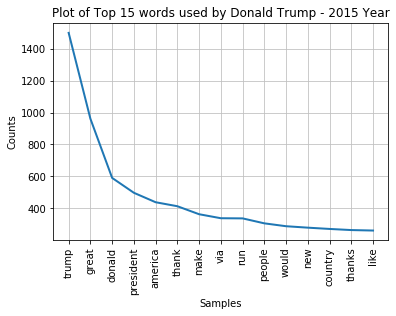

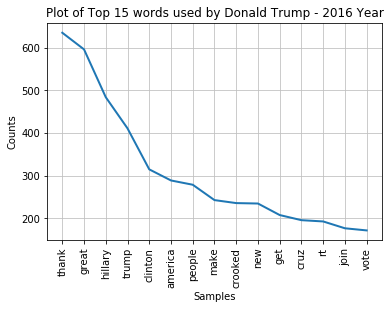

In [29]:
# Year 2015
import matplotlib.pyplot as plot
fd_words15.plot(15, cumulative=False, title='Plot of Top 15 words used by Donald Trump - 2015 Year')
# Year 2016
fd_words16.plot(15, cumulative=False, title='Plot of Top 15 words used by Donald Trump - 2016 Year')

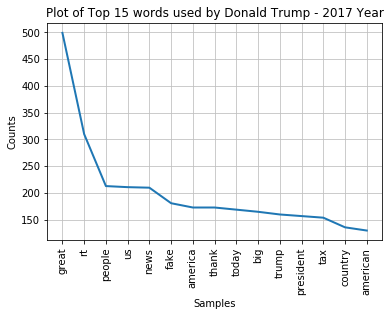

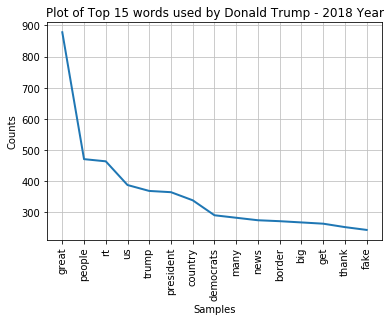

In [28]:
# Year 2017
fd_words17.plot(15, cumulative=False, title='Plot of Top 15 words used by Donald Trump - 2017 Year')
# Year 2018
fd_words18.plot(15, cumulative=False, title='Plot of Top 15 words used by Donald Trump - 2018 Year')

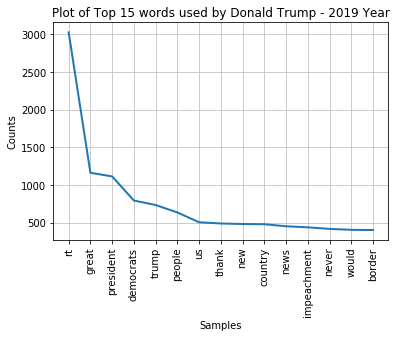

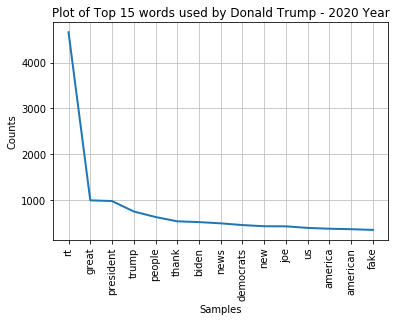

In [30]:
# Year 2019
fd_words19.plot(15, cumulative=False, title='Plot of Top 15 words used by Donald Trump - 2019 Year')
# Year 2020
fd_words20.plot(15, cumulative=False, title='Plot of Top 15 words used by Donald Trump - 2020 Year')

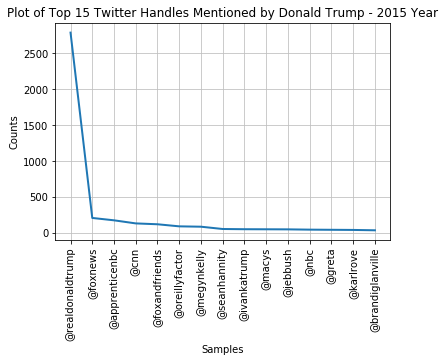

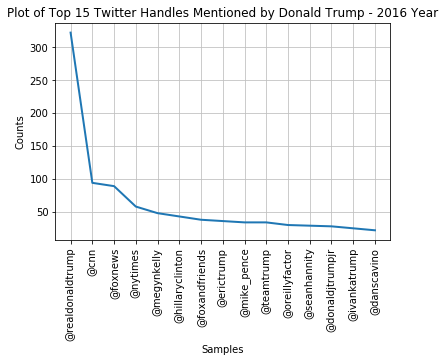

In [31]:
# Year 2015
fd_handles15.plot(15, cumulative=False, title='Plot of Top 15 Twitter Handles Mentioned by Donald Trump - 2015 Year')
# Year 2016
fd_handles16.plot(15, cumulative=False, title='Plot of Top 15 Twitter Handles Mentioned by Donald Trump - 2016 Year')

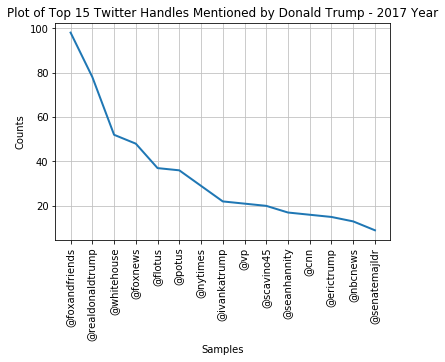

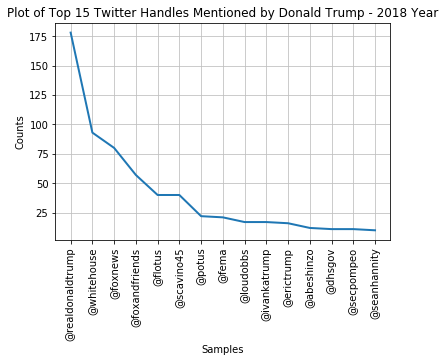

In [32]:
# Year 2017
fd_handles17.plot(15, cumulative=False, title='Plot of Top 15 Twitter Handles Mentioned by Donald Trump - 2017 Year')
# Year 2018
fd_handles18.plot(15, cumulative=False, title='Plot of Top 15 Twitter Handles Mentioned by Donald Trump - 2018 Year')

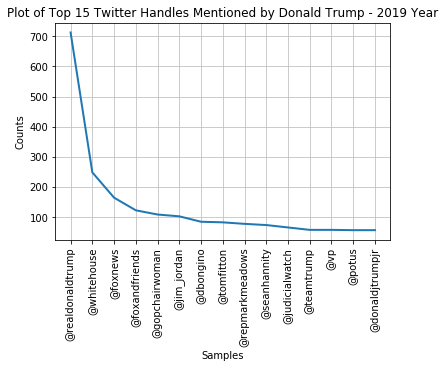

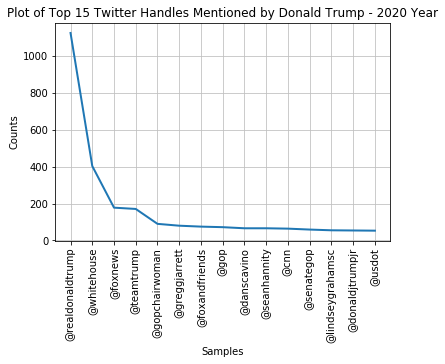

In [33]:
# Year 2019
fd_handles19.plot(15, cumulative=False, title='Plot of Top 15 Twitter Handles Mentioned by Donald Trump - 2019 Year')
# Year 2020
fd_handles20.plot(15, cumulative=False, title='Plot of Top 15 Twitter Handles Mentioned by Donald Trump - 2020 Year')

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

def get_polarity(tweetlist):
    sentiment = {}
    analyzer = SentimentIntensityAnalyzer()
    polarity = [0]*len(tweetlist)
    for i, tweet in enumerate(tweetlist):
        tweet = tweet.strip(punctuation).lower()
        tweet = re.sub(r'http\S+', ' ', tweet)
        sentiment[i] = analyzer.polarity_scores(tweet)
        polarity[i] = sentiment[i]['compound']
        
    return polarity

tweets_15['polarity'] = get_polarity(tweetlist15)
tweets_16['polarity'] = get_polarity(tweetlist16)
tweets_17['polarity'] = get_polarity(tweetlist17)
tweets_18['polarity'] = get_polarity(tweetlist18)
tweets_19['polarity'] = get_polarity(tweetlist19)
tweets_20['polarity'] = get_polarity(tweetlist20)


C:\Users\vidhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\vidhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\vidhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

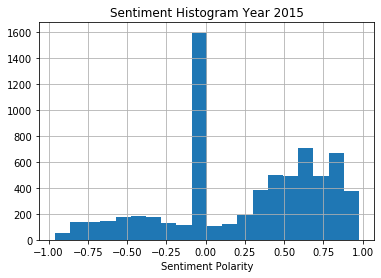

In [40]:
plt.title('Sentiment Histogram Year 2015')
plt.xlabel('Sentiment Polarity')
tweets_15['polarity'].hist(bins=20) #blue

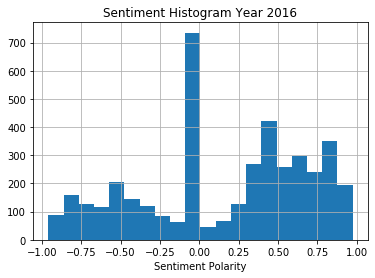

In [39]:
plt.title('Sentiment Histogram Year 2016')
plt.xlabel('Sentiment Polarity')
tweets_16['polarity'].hist(bins=20) #blue

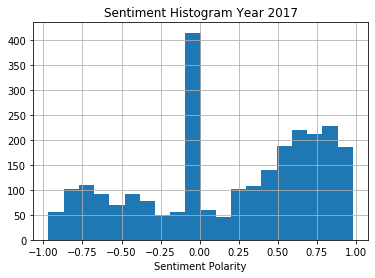

In [41]:
plt.title('Sentiment Histogram Year 2017')
plt.xlabel('Sentiment Polarity')
tweets_17['polarity'].hist(bins=20) #blue

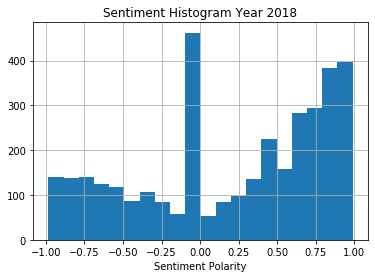

In [42]:
plt.title('Sentiment Histogram Year 2018')
plt.xlabel('Sentiment Polarity')
tweets_18['polarity'].hist(bins=20) #blue

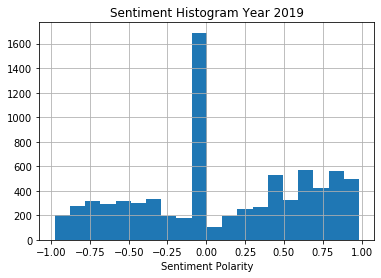

In [43]:
plt.title('Sentiment Histogram Year 2019')
plt.xlabel('Sentiment Polarity')
tweets_19['polarity'].hist(bins=20) #blue

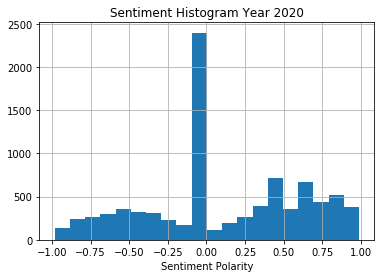

In [44]:
plt.title('Sentiment Histogram Year 2020')
plt.xlabel('Sentiment Polarity')
tweets_20['polarity'].hist(bins=20) #blue

In [45]:
tweetlist15

['I would like to wish everyone A HAPPY AND HEALTHY NEW YEAR. WE MUST ALL WORK TOGETHER TO FINALLY MAKE AMERICA SAFE AGAIN AND GREAT AGAIN!',
 "Do you believe that The State Department on NEW YEAR'S EVE just released more of Hillary's e-mails. They just want it all to end. BAD!",
 "THANK YOU ILLINOIS! Let's not forget to get family &amp; friends- out to VOTE IN 2016! https://t.co/lg5kMbNLYK https://t.co/dtMAsIq4cf",
 'HAPPY BIRTHDAY to my son @DonaldJTrumpJr! Very proud of you! #TBT https://t.co/ULerCEOCGX https://t.co/nbxPVdarJM',
 "I would feel sorry for @JebBush and how badly he is doing with his campaign other than for the fact he took millions of $'s of hit ads on me",
 '#MakeAmericaGreatAgain #Trump2016 https://t.co/IEIXos0wh9',
 '@whispers34: Nevada Poll: Donald Trump 33% Ted Cruz 20% Marco Rubio 11%... https://t.co/Hniy4iAqNG via @thelastrefuge2  Great news!',
 '@deggow: Just heard a 25 year old man say I would rather work for Donald Trump than Bernie Sanders"it\'s time for me 